<a href="https://colab.research.google.com/github/rickiepark/fine-tuning-llm/blob/main/Chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5Ïû• `SFTTrainer`Î°ú ÎØ∏ÏÑ∏ ÌäúÎãù ÌïòÍ∏∞


### Ïä§Ìè¨ÏùºÎü¨

- ÌõàÎ†® Ï§ëÏóê Î©îÎ™®Î¶¨ Î∂ÄÏ°± Ïò§Î•òÎ•º ÌîºÌïòÍ∏∞ Ïñ¥Î†§Ïö¥ Ïù¥Ïú†Î•º Ïù¥Ìï¥Ìï©ÎãàÎã§.
- GPU RAMÏùÑ ÏµúÎåÄÌïú ÌôúÏö©Ìï† Ïàò ÏûàÎäî ÏÑ§Ï†ïÏùÑ ÏïåÏïÑ Î¥ÖÎãàÎã§.
- `trl` Ìå®ÌÇ§ÏßÄÏùò `SFTTrainer` ÌÅ¥ÎûòÏä§Î•º ÏÇ¨Ïö©Ìï¥ Î™®Îç∏ÏùÑ ÎØ∏ÏÑ∏ ÌäúÎãùÌï©ÎãàÎã§.
- (ÌîåÎûòÏãú Ïñ¥ÌÖêÏÖò 2ÏôÄ ÌååÏù¥ÌÜ†ÏπòÏùò SDPA Í∞ôÏùÄ) Î©îÎ™®Î¶¨ Ìö®Ïú®Ï†ÅÏù∏ Ïñ¥ÌÖêÏÖò Íµ¨ÌòÑÏùò Ïû•Ï†êÏùÑ ÎÖºÏùòÌï©ÎãàÎã§.

### Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò

ÌõàÎ†® Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌï¥ Ïù¥ Ï±ÖÏóêÏÑú ÏÇ¨Ïö©ÌïòÎäî Îã§Ïùå Î≤ÑÏ†ÑÍ≥º ÎèôÏùº Î≤ÑÏ†ÑÏùÑ ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.

In [1]:
!pip install transformers==4.56.1 peft==0.17.0 accelerate==1.10.0 trl==0.23.1 bitsandbytes==0.47.0 datasets==4.0.0 huggingface-hub==0.34.4 safetensors==0.6.2 pandas==2.2.2 matplotlib==3.10.0 numpy==2.0.2

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42.2/42.2 kB 3.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11.6/11.6 MB 113.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 503.9/503.9 kB 30.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 374.7/374.7 kB 33.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 564.6/564.6 kB 35.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61.3/61.3 MB 36.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

### ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

In [2]:
import numpy as np
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from datasets import load_dataset, Dataset
from peft import get_peft_model, prepare_model_for_kbit_training, LoraConfig, \
    AutoPeftModelForCausalLM
from transformers import Trainer, TrainingArguments, AutoTokenizer, \
    AutoModelForCausalLM, BitsAndBytesConfig
from trl import SFTTrainer, SFTConfig, setup_chat_format

In [3]:
# ÍπÉÌóàÎ∏åÏóêÏÑú compatibility_functions.py ÌååÏùºÍ≥º compatibility_functions.py ÌååÏùºÏùÑ Îã§Ïö¥Î°úÎìúÌï©ÎãàÎã§.
!wget https://raw.githubusercontent.com/rickiepark/fine-tuning-llm/refs/heads/main/helper_functions.py
!wget https://raw.githubusercontent.com/rickiepark/fine-tuning-llm/refs/heads/main/compatibility_functions.py

from helper_functions import *
from compatibility_functions import DataCollatorForCompletionOnlyLM

--2025-10-25 05:42:34--  https://raw.githubusercontent.com/rickiepark/fine-tuning-llm/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6492 (6.3K) [text/plain]
Saving to: ‚Äòhelper_functions.py‚Äô

helper_functions.py 100%[===================>]   6.34K  --.-KB/s    in 0s      

2025-10-25 05:42:35 (118 MB/s) - ‚Äòhelper_functions.py‚Äô saved [6492/6492]

--2025-10-25 05:42:35--  https://raw.githubusercontent.com/rickiepark/fine-tuning-llm/refs/heads/main/compatibility_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

### Î™©Ìëú

ÌôúÏÑ±Ìôî Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú Í≥µÍ∞ÑÏù¥ ÎÇ®ÏïÑ ÏûàÎäî Ìïú Î≤†Ïù¥Ïä§ Î™®Îç∏, Ïñ¥ÎåëÌÑ∞, ÏòµÌã∞ÎßàÏù¥Ï†Ä, ÎØ∏Îãà Î∞∞ÏπòÎ•º ÏµúÎåÄÌïú GPU RAMÏóê Î∞ÄÏñ¥ ÎÑ£ÏäµÎãàÎã§. Î©îÎ™®Î¶¨ ÌôïÎ≥¥Î•º ÏúÑÌï¥ Í≥ÑÏÇ∞ÏùÑ Ìù¨ÏÉùÌïòÍ≥†(Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏ Ï≤¥ÌÅ¨Ìè¨Ïù∏ÌåÖ), ÌååÎùºÎØ∏ÌÑ∞ ÏóÖÎç∞Ïù¥Ìä∏Î•º ÏßÄÏó∞ÌïòÍ≥†(Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏ ÎàÑÏ†Å), Î©îÎ™®Î¶¨ Ìö®Ïú®Ï†ÅÏù∏ Ïñ¥ÌÖêÏÖò Î©îÏª§ÎãàÏ¶ò Íµ¨ÌòÑ(ÌîåÎûòÏãú Ïñ¥ÌÖêÏÖòÏù¥ÎÇò ÌååÏù¥ÌÜ†ÏπòÏùò SDPA)ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

### Ï§ÄÎπÑ Ïö¥Îèô

![](https://github.com/dvgodoy/FineTuningLLMs/blob/main/images/ch5/forward_pass.png?raw=True)
<center>Í∑∏Î¶º 5.1 Ï†ïÎ∞©Ìñ• Í≥ÑÏÇ∞</center>

![](https://github.com/dvgodoy/FineTuningLLMs/blob/main/images/ch5/backward_pass.png?raw=True)
<center>Í∑∏Î¶º 5.2 Ïó≠Î∞©Ìñ• Í≥ÑÏÇ∞</center>

### ÌõàÎ†® Í≥ºÏ†ï ÌïµÏã¨ Ï†ïÎ¶¨

$$
\Large
\text{memory}_{\text{total}} = \underbrace{\text{memory}_{\text{model}}}_{\text{stage}_0} +
\underbrace{\text{memory}_{\text{batch}} + \text{memory}_{\text{act}}}_{\text{stage}_1} + \underbrace{\text{memory}_{\text{grad}}}_{\text{stage}_2} + \underbrace{\text{memory}_{\text{optim}}}_{\text{stage}_3}
$$

<center>Ïãù 5.1 Î™®Îç∏ ÌõàÎ†®Ïóê ÏÇ¨Ïö©ÎêòÎäî Ï¥ù Î©îÎ™®Î¶¨</center>

![](https://github.com/dvgodoy/FineTuningLLMs/blob/main/images/ch5/gpu_ram-no_lora.png?raw=True)
<center>Í∑∏Î¶º 5.3 Í∞ÄÏ§ëÏπò, Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏, ÏòµÌã∞ÎßàÏù¥Ï†ÄÏóêÏÑú ÏÇ¨Ïö©ÎêòÎäî Î©îÎ™®Î¶¨ </center>

![](https://github.com/dvgodoy/FineTuningLLMs/blob/main/images/ch5/gpu_ram-8bit_adam.png?raw=True)
<center>Í∑∏Î¶º 5.4 Í∞ÄÏ§ëÏπò, Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏, ÏòµÌã∞ÎßàÏù¥Ï†ÄÏóêÏÑú ÏÇ¨Ïö©ÎêòÎäî Î©îÎ™®Î¶¨ </center>

![](https://github.com/dvgodoy/FineTuningLLMs/blob/main/images/ch5/gpu_ram-lora.png?raw=True)
<center>Í∑∏Î¶º 5.5 LoRAÏùò Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ</center>

![](https://github.com/dvgodoy/FineTuningLLMs/blob/main/images/ch5/gpu_ram-lora_s.png?raw=True)
<center>Í∑∏Î¶º 5.6 ÌôúÏÑ±Ìôî Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ</center>


![](https://github.com/dvgodoy/FineTuningLLMs/blob/main/images/ch5/gpu_ram-lora_short_s.png?raw=True)
<center>Figure 5.5 - Taking activations into account (shorter sequences)</center>

$$
\Large
\frac{\text{memory}_{\text{act}}^{\text{eager attn}}}{\text{memory}_{\text{model}}} = \left[3\frac{s}{h} + \frac{1}{2}n_{\text{heads}}\left(\frac{s}{h}\right)^2\right]\frac{p_{\text{comp}}}{p_{\text{model}}}
$$

<center>Ïãù 5.2 ÌôúÏÑ±ÌôîÏôÄ Î™®Îç∏Ïùò Î©îÎ™®Î¶¨ ÏÇ¨Ïö© ÎπÑÏú®</center>

****
**Ïù∏Í∏∞ Î™®Îç∏Ïùò Íµ¨ÏÑ±**

| Î™®Îç∏ | hidden_dim (h)  | max seq (s) | n_heads (n_h)  | n_layers (L) |
|---|---|---|---|---|
| OPT-350M  | 1024  | 2048  | 16  | 24  |
| Phi-3.5 Mini  | 3072  | 4096  | 32  | 32  |
| Llama-2 7B  | 4096  | 4096  | 32  | 32  |
| Llama-3.2 3B  | 3072  | 8192  | 24  | 28  |
| Mistral 8B  | 4096  | 32768  | 32  | 32  |
| Qwen-2.5 7B  | 3584  | 32768  | 28  | 28  |
| OLMo 7B  | 4096  | 2048  | 32  | 32   |
****

$$
\Large
\begin{aligned}
\frac{\text{memory}_{\text{act}}^{\text{eager attn}}}{18} &= \left[3\frac{500}{2048} + \frac{1}{2}16\left(\frac{500}{2048}\right)^2\right]\frac{16}{8}
\\
&= \left[\frac{3}{4}+\frac{1}{2}\right]2 = \frac{3}{2} + 1
\\
\text{memory}_{\text{act}}^{\text{eager attn}} &= 18\frac{3}{2} + 18 = 27 + 18 = 45
\end{aligned}
$$
<center>Ïãù 5.3 ÌôúÏÑ±ÌôîÏôÄ Î™®Îç∏Ïùò Î©îÎ™®Î¶¨ ÏÇ¨Ïö© ÎπÑÏú® Í≥ÑÏÇ∞</center>

$$
\Large
\frac{\text{memory}_{\text{act}}^{\text{flash attn}}}{\text{memory}_{\text{model}}} = 3\frac{s}{h}\frac{p_{\text{comp}}}{p_{\text{model}}}
$$
<center>Ïãù 5.4 Ìö®Ïú®Ï†ÅÏù∏ Ïñ¥ÌÖêÏÖò Íµ¨ÌòÑÏóêÏÑú ÌôúÏÑ±ÌôîÏôÄ Î™®Îç∏Ïùò Î©îÎ™®Î¶¨ ÏÇ¨Ïö© ÎπÑÏú®</center>

$$
\Large
\text{batch_size}_{\text{effective}} = \text{batch_size}_{\text{micro}} * \text{n_accumulation_steps}
$$
<center>Ïãù 5.5 Ïú†Ìö® ÎØ∏Îãà Î∞∞Ïπò ÌÅ¨Í∏∞</center>

![](https://github.com/dvgodoy/FineTuningLLMs/blob/main/images/ch5/training_loop.png?raw=True)
<center>Í∑∏Î¶º 5.8 Î©îÎ™®Î¶¨ Ï†àÏïΩ Í∏∞Î≤ïÍ≥º ÌõàÎ†® Î£®ÌîÑÏùò Îã®Í≥Ñ</center>

$$
\Large
\text{memory}_{\text{total}} = \underbrace{\text{memory}_{\text{model}}}_{\text{quantization}} +
\underbrace{\text{memory}_{\text{batch}}}_{\text{grad acc}} + \underbrace{\text{memory}_{\text{act}}}_{\text{grad checkp \ flash attn}} + \underbrace{\text{memory}_{\text{grad}} + \text{memory}_{\text{optim}}}_{\text{LoRA \ 8-bit paged optim \ grad acc}}
$$
<center>Ïãù 5.6 Î©îÎ™®Î¶¨ Ï†àÏïΩ Í∏∞Î≤ïÍ≥º Ï†ÅÏö© ÎåÄÏÉÅ</center>

****
**ÌôúÏÑ±Ìôî Î©îÎ™®Î¶¨ Í≥µÏãù**

Ïù¥ ÏÇ¨Ïù¥ÎìúÎ∞îÏóêÏÑú Î©îÎ™®Î¶¨ Ìï†Îãπ Í≥µÏãùÏù¥ Ïñ¥ÎñªÍ≤å ÎßåÎì§Ïñ¥Ï°åÎäîÏßÄ ÏÑ§Î™ÖÌïòÍ≤†ÏäµÎãàÎã§. Ïù¥ Í≥µÏãùÏùÄ Korthikanti Îì±Ïù¥ Ïì¥ ["Reducing Activation Recomputation in Large Transformer Models"](https://arxiv.org/abs/2205.05198) ÎÖºÎ¨∏ÏùÑ Í∏∞Î∞òÏúºÎ°ú Ìï©ÎãàÎã§.

ÏùÄÎãâ ÌÅ¨Í∏∞ $h$(Î™®Îç∏Ïùò Ï∞®Ïõê), $L$ Í∞úÏùò Ï∏µ(Ìä∏ÎûúÏä§Ìè¨Î®∏ Î∏îÎ°ù), $n_\text{heads}$ Í∞úÏùò Ïñ¥ÌÖêÏÖò Ìó§ÎìúÎ•º Í∞ÄÏßÑ ÏùºÎ∞òÏ†ÅÏù∏ Ìä∏ÎûúÏä§Ìè¨Î®∏ Î™®Îç∏Ïùò Í≤ΩÏö∞, Î™®Îç∏Ïùò Ï¥ù ÌååÎùºÎØ∏ÌÑ∞ Í∞úÏàòÏôÄ ÏãúÌÄÄÏä§ Í∏∏Ïù¥ $s$Ïù∏ ÎØ∏Îãà Î∞∞Ïπò $b$ÏóêÏÑú Í≥ÑÏÇ∞ÎêòÎäî ÌôúÏÑ±Ìôî Ï¥ù ÌÅ¨Í∏∞Îäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

$$
\Large
\begin{align}
\text{memory}_{\text{model}} = &L 12 h^2
\\
\text{memory}_{\text{act}} = &L \left( \alpha h b s + \beta n_{\text{heads}} b s^2 \right)
\end{align}
$$
<center>Ïãù 5.7 ÏùºÎ∞òÏ†ÅÏù∏ Ìä∏ÎûúÏä§Ìè¨Î®∏Î•º ÏúÑÌïú Í≥µÏãù</center>

Í≥µÏãù ÎÅùÏóê ÏãúÌÄÄÏä§ Í∏∏Ïù¥Ïùò Ï†úÍ≥±Ïù¥ Î≥¥Ïù¥ÎÇòÏöî? Ï¶âÏãú Î™®Îìú Ïñ¥ÌÖêÏÖòÏùò ÎÜíÏùÄ ÎπÑÏö©Ïù¥ Ïó¨Í∏∞ÏÑú ÎìúÎü¨ÎÇ©ÎãàÎã§.

[QUESTION]
"_ÏïåÌåå(ùõº)ÏôÄ Î≤†ÌÉÄ(ùõΩ)Îäî Î¨¥Ïñ∏Í∞ÄÏöî..._"

Ï¢ãÏùÄ ÏßÄÏ†ÅÏûÖÎãàÎã§! Ï¶âÏãú Î™®Îìú Ïñ¥ÌÖêÏÖòÏùÑ ÏÇ¨Ïö©ÌïòÎäî ÌèâÎ≤îÌïú Ìä∏ÎûúÏä§Ìè¨Î®∏Ïùò Í≤ΩÏö∞ ÏïåÌååÏôÄ Î≤†ÌÉÄÎäî Í∞ÅÍ∞Å 34ÏôÄ 5ÏûÖÎãàÎã§. ÌïòÏßÄÎßå ÌïµÏã¨ÏùÄ ÌîåÎûòÏãú Ïñ¥ÌÖêÏÖò(ÎòêÎäî SDPA)ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ΩÏö∞ Î≤†ÌÉÄÎäî 0Ïù¥ Îê©ÎãàÎã§! ÎçîÏù¥ÏÉÅ ÏãúÌÄÄÏä§ Í∏∏Ïù¥Î•º Ï†úÍ≥±ÌïòÏßÄ ÏïäÏïÑÎèÑ Îê©ÎãàÎã§!

$$
\Large
\begin{align}
\text{memory}_{\text{act}}^{\text{eager attn}} \underset{\alpha=34\\\beta=5}{=} &L \left( 34 h b s + 5 n_{\text{heads}} b s^2 \right)
\\
\text{memory}_{\text{act}}^{\text{flash attn}} \underset{\alpha=34\\\beta=0}{=} &L \left( 34 h b s \right)
\end{align}
$$
<center>Ïãù 5.8 Ï¶âÏãú Î™®Îìú Ïñ¥ÌÖêÏÖòÍ≥º ÌîåÎûòÏãú Ïñ¥ÌÖêÏÖòÏùÑ ÏúÑÌïú Í≥µÏãù</center>

ÏúÑ Îëê Í≥µÏãùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌôúÏÑ±ÌôîÎ•º ÏúÑÌï¥ Ìï†ÎãπÎêú Î©îÎ™®Î¶¨ÏôÄ Î™®Îç∏ ÏûêÏ≤¥ÏóêÏÑú Ï†êÏú†Ìïú Î©îÎ™®Î¶¨ Í∞ÑÏùò ÎπÑÏú®ÏùÑ Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥ Í≤ΩÏö∞ Í≥ÑÏÇ∞Ïóê ÏÇ¨Ïö©Îêú Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ(`p_comp`)ÏôÄ Î™®Îç∏ Í∞ÄÏ§ëÏπòÏóê ÏÇ¨Ïö©Îêú Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ(`p_model`)ÏùÑ Í≥†Î†§Ìï¥Ïïº Ìï©ÎãàÎã§.

$$
\Large
\begin{align}
\frac{\text{memory}_{\text{act}}^{\text{eager attn}}}{\text{memory}_{\text{model}}} &= \left[\frac{34bs}{12h} + \frac{5n_{\text{heads}}bs^2}{12h^2}\right]\frac{p_{\text{comp}}}{p_{\text{model}}}
\\
&\underset{b=1}{\approx} \left[3\frac{s}{h} + \frac{1}{2}n_{\text{heads}}\left(\frac{s}{h}\right)^2\right]\frac{p_{\text{comp}}}{p_{\text{model}}}
\end{align}
$$

$$
\Large
\begin{align}
\frac{\text{memory}_{\text{act}}^{\text{flash attn}}}{\text{memory}_{\text{model}}} &= \frac{34bs}{12h}\frac{p_{\text{comp}}}{p_{\text{model}}}  \underset{b=1}{\approx} 3\frac{s}{h}\frac{p_{\text{comp}}}{p_{\text{model}}}
\end{align}
$$
<center>Ïãù 5.9 Ï¶âÏãú Î™®Îìú Ïñ¥ÌÖêÏÖòÍ≥º ÌîåÎûòÏãú Ïñ¥ÌÖêÏÖòÏùò Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ ÎπÑÏú®</center>

Ïûê, Í≤∞Í≥ºÍ∞Ä ÎÇòÏôîÏäµÎãàÎã§! Îã®ÏàúÌôîÎ•º ÏúÑÌï¥ ÎØ∏Îãà Î∞∞Ïπò ÌÅ¨Í∏∞Î•º 1Î°ú Í∞ÄÏ†ïÌïòÍ≥† Î∂ÑÏàòÎ•º Î∞òÏò¨Î¶ºÌïòÎ©¥ ÏïûÏóêÏÑú ÏÜåÍ∞úÌïú Í≤ÉÍ≥º ÎèôÏùºÌïú Í≥µÏãùÏùÑ ÏñªÍ≤å Îê©ÎãàÎã§.
****

### Ï§ÄÎπÑ ÏΩîÎìú

In [4]:
supported = torch.cuda.is_bf16_supported(including_emulation=False)
compute_dtype = (torch.bfloat16 if supported else torch.float32)

nf4_config = BitsAndBytesConfig(
   load_in_4bit=True,
   bnb_4bit_quant_type="nf4",
   bnb_4bit_use_double_quant=True,
   bnb_4bit_compute_dtype=compute_dtype
)

model_q4 = AutoModelForCausalLM.from_pretrained("facebook/opt-350m",
                                                device_map='cuda:0',
                                                quantization_config=nf4_config)

model_q4 = prepare_model_for_kbit_training(model_q4)

config = LoraConfig(
    r=16,
    lora_alpha=32,
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM",
)
peft_model = get_peft_model(model_q4, config)

tokenizer = AutoTokenizer.from_pretrained("facebook/opt-350m")
tokenizer = modify_tokenizer(tokenizer)
tokenizer = add_template(tokenizer)

peft_model = modify_model(peft_model, tokenizer)

dataset = load_dataset("dvgodoy/yoda_sentences", split="train")
dataset = dataset.rename_column("sentence", "prompt")
dataset = dataset.rename_column("translation_extra", "completion")

config.json:   0%|          | 0.00/644 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/663M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/662M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/531 [00:00<?, ?B/s]

sentences.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/720 [00:00<?, ? examples/s]

***

**Ï§ëÏöî**: ÏïàÌÉÄÍπùÍ≤åÎèÑ ÏµúÍ∑º Î≤ÑÏ†ÑÏùò trl ÎùºÏù¥Î∏åÎü¨Î¶¨Îäî (promptÏôÄ completion Ïó¥ÏùÑ ÌïÑÏöîÎ°ú ÌïòÎäî) ÏßÄÏãú Ìè¨Îß∑ÏùÑ ÎçîÏù¥ÏÉÅ ÏßÄÏõêÌïòÏßÄ ÏïäÏäµÎãàÎã§. Ïù¥Î°ú Ïù∏Ìï¥ Ï±ÑÌåÖ ÌÖúÌîåÎ¶øÏù¥ Ïò¨Î∞îÎ•¥Í≤å Ï†ÅÏö©ÎêòÏßÄ ÏïäÏäµÎãàÎã§. Ïù¥ Î¨∏Ï†úÎ•º ÌîºÌïòÍ∏∞ ÏúÑÌï¥ ÎåÄÌôî Ìè¨Îß∑ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.
***

In [5]:
# trl.extras.dataset_formatting.instructions_formatting_functionÏùÑ Ï∞∏Í≥†Ìï®.
# Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ (ÎçîÏù¥ÏÉÅ ÏßÄÏõêÎêòÏßÄ ÏïäÎäî) prompt/completion Ìè¨Îß∑ÏóêÏÑú ÎåÄÌôî Ìè¨Îß∑ÏúºÎ°ú Î≥ÄÍ≤ΩÌï©ÎãàÎã§.
def format_dataset(examples):
    if isinstance(examples["prompt"], list):
        output_texts = []
        for i in range(len(examples["prompt"])):
            converted_sample = [
                {"role": "user", "content": examples["prompt"][i]},
                {"role": "assistant", "content": examples["completion"][i]},
            ]
            output_texts.append(converted_sample)
        return {'messages': output_texts}
    else:
        converted_sample = [
            {"role": "user", "content": examples["prompt"]},
            {"role": "assistant", "content": examples["completion"]},
        ]
        return {'messages': converted_sample}

dataset = dataset.map(format_dataset)
dataset = dataset.remove_columns(['prompt', 'completion', 'translation'])

Map:   0%|          | 0/720 [00:00<?, ? examples/s]

### `SFTTrainer`Î°ú ÎØ∏ÏÑ∏ ÌäúÎãùÌïòÍ∏∞

****
**`SFTTrainer`Î°ú ÎØ∏ÏÑ∏ ÌäúÎãùÌïòÍ∏∞" ÏöîÏïΩ**
- Îã§Ïùå ÌõàÎ†® ÌÅ¥ÎûòÏä§ Í∞ùÏ≤¥Îäî Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÏßÄÏõêÌïòÎäî Ìè¨Îß∑ Ï§ë ÌïòÎÇòÏù∏ Í∏∞Î≥∏Ï†ÅÏù∏ Í≤ΩÏö∞Ïóê Ìï¥ÎãπÌï©ÎãàÎã§.
  - ÌîÑÎ°¨ÌîÑÌä∏ÏôÄ ÏôÑÏÑ± Î™®ÎëêÏóê ÎåÄÌï¥ÏÑú ÌõàÎ†®
    ```python
    supported = torch.cuda.is_bf16_supported(including_emulation=False)
    trainer = SFTTrainer(
        model=model,
        processing_class=tokenizer,
        train_dataset=train_dataset,
        eval_dataset=eval_dataset
        peft_config=peft_config,
        data_collator=None,
        args=SFTConfig(
            output_dir="./future_name_on_the_hub",
            packing=True,
            packing_strategy='wrapped',
            max_length=max_seq_length,
            bf16=supported
        )
    )
    ```
  - ÏôÑÏÑ±ÏóêÏÑúÎßå ÌõàÎ†®
    ```python
    supported = torch.cuda.is_bf16_supported(including_emulation=False)
    tokenizer.padding_side='left'
    response_template = '...' # according to the tokenizer's chat template
    collator_fn=DataCollatorForCompletionOnlyLM(response_template, tokenizer=tokenizer)

    trainer = SFTTrainer(
        model=model,
        processing_class=tokenizer,
        train_dataset=train_dataset,
        eval_dataset=eval_dataset,
        peft_config=peft_config,
        data_collator=collator_fn,
        args=SFTConfig(
            output_dir="./future_name_on_the_hub",
            packing=False,
            max_seq_length=max_seq_length,
            bf16=supported
        )
    )
    ```
- ÌõàÎ†® ÌÅ¥ÎûòÏä§Î•º ÌÜµÌï¥ Î™®Îç∏Ïóê LoRAÎ•º Ï†ÅÏö©ÌïòÎ©¥ ÏûêÎèôÏúºÎ°ú `get_peft_model()`ÏôÄ `prepare_model_for_kbit_training()`Î•º Ìò∏Ï∂úÌï©ÎãàÎã§.
  - `model` Îß§Í∞úÎ≥ÄÏàòÎäî Î≤†Ïù¥Ïä§ Î™®Îç∏ÏùÑ Î∞õÏïÑÏïº Ìï©ÎãàÎã§(ÏñëÏûêÌôîÎêú Î™®Îç∏ÎèÑ Í∞ÄÎä•ÌïòÏßÄÎßå ÏßÅÏ†ë `get_peft_model()` Ìï®ÏàòÎ•º Ìò∏Ï∂úÌï¥ÏÑúÎäî ÏïàÎê©ÎãàÎã§).
  - `peft_config`Îäî `LoraConfig`Ïùò Ïù∏Ïä§ÌÑ¥Ïä§Î•º Î∞õÏïÑÏïº Ìï©ÎãàÎã§.
- Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÏßÄÏõêÌïòÎäî Ìè¨Îß∑ Ï§ë ÌïòÎÇòÍ∞Ä ÏïÑÎãå Í≤ΩÏö∞ `formatting_func` Îß§Í∞úÎ≥ÄÏàòÎ•º ÏÇ¨Ïö©Ìï¥ ÏÇ¨Ïö©Ïûê Ï†ïÏùò Ìè¨Îß∑ÌåÖ Ìï®ÏàòÎ•º ÏßÄÏ†ïÌï©ÎãàÎã§(4Ïû•Ïùò BYOFF).
- ÌõàÎ†® ÌÅ¥ÎûòÏä§Ïùò Ïù∏Ïä§ÌÑ¥Ïä§Î•º ÎßåÎì† ÌõÑ ÎØ∏Îãà Î∞∞ÏπòÎ•º Ï∂îÏ∂úÌïòÏó¨ ÏΩúÎ†àÏù¥ÌÑ∞Í∞Ä Ï†ÅÏ†àÌïòÍ≤å ÏÑ§Ï†ïÎêòÏñ¥ ÏûàÍ≥† Î†àÏù¥Î∏îÏù¥ ÏòàÏÉÅÎåÄÎ°úÏù∏ÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.
    ```python
    dataloader = trainer.get_train_dataloader()
    batch = next(iter(dataloader))
    labels = batch['labels'][0]
    valid = labels >= 0
    print(tokenizer.decode(labels[valid]))
    ```
****

In [6]:
mvt_trainer = SFTTrainer(
    model=peft_model,
    processing_class=tokenizer,
    train_dataset=dataset,
    args=SFTConfig(
        output_dir="./future_model_name_on_the_hub",
        report_to='none'
    )
)

Tokenizing train dataset:   0%|          | 0/720 [00:00<?, ? examples/s]

Truncating train dataset:   0%|          | 0/720 [00:00<?, ? examples/s]

#### Îç∞Ïù¥ÌÑ∞ Î°úÎçî Îã§Ïãú ÌôïÏù∏ÌïòÍ∏∞

In [7]:
mvt_train_dataloader = mvt_trainer.get_train_dataloader()
batch = next(iter(mvt_train_dataloader))
batch['input_ids'][:2]

tensor([[50265, 12105, 50118,  1213,   362,    49,  1159,    31,     5,   285,
           334,     4,     2, 50118, 50265,  2401, 33388, 50118,  7605,     5,
           285,   334,     6,    49,  1159,    51,   362,     4,   289,   338,
         41311,     4,     2, 50118,     1,     1,     1,     1,     1,     1,
             1,     1],
        [50265, 12105, 50118,   250,  9371,    16,    99, 33199,   460,  1733,
            11,     4,     2, 50118, 50265,  2401, 33388, 50118,  2264, 33199,
           460,  1733,    11,     6,    10,  9371,    16,     4,   854, 47820,
          7485,    29,     4,     2, 50118,     1,     1,     1,     1,     1,
             1,     1]], device='cuda:0')

In [8]:
tokenizer.pad_token_id, tokenizer.padding_side

(1, 'right')

Ìå®Îî© ÌÜ†ÌÅ∞ÏùÄ ÏôºÏ™ΩÏóê ÏûàÏñ¥Ïïº Ìï©ÎãàÎã§. ÏÉùÏÑ± Ïñ∏Ïñ¥ Î™®Îç∏ÏùÑ ÌõàÎ†®Ìï† Îïå Ïò§Î•∏Ï™Ω Ìå®Îî©ÏùÄ ÏÇ¨Ïö©Ìï¥ÏÑúÎäî ÏïàÎê©ÎãàÎã§.

![](https://github.com/dvgodoy/FineTuningLLMs/blob/main/images/ch4/packing_flow.png?raw=True)

<center>Í∑∏Î¶º 5.9 Ïò¨Î∞îÎ•∏ Îç∞Ïù¥ÌÑ∞ ÏÑ§Ï†ï ÏÑ†ÌÉùÌïòÍ∏∞</center>

In [9]:
pack_trainer = SFTTrainer(
    model=peft_model,
    processing_class=tokenizer,
    train_dataset=dataset,
    data_collator=None,
    args=SFTConfig(
        output_dir="./future_name_on_the_hub",
        packing=True,
        packing_strategy='wrapped',
        max_length=64,
        report_to='none',
        bf16=supported
    )
)

Packing train dataset:   0%|          | 0/720 [00:00<?, ? examples/s]

In [10]:
pack_train_dataloader = pack_trainer.get_train_dataloader()
batch = next(iter(pack_train_dataloader))
batch['input_ids'][:2]

tensor([[50265, 12105, 50118,   133,  4716,  1536,  1136,    19,     5,   220,
         32322,     9,  2508,     4,     2, 50118, 50265,  2401, 33388, 50118,
          3908,     5,   220, 32322,     9,  2508,     6,     5,  4716,  1536,
          1136,     4,  3216,     6,  1368, 28015, 41311,     4,     2, 50118,
         50265, 12105, 50118, 34306,   110,   275, 35310,     7,     5,   371,
          1380,     4,     2, 50118, 50265,  2401, 33388, 50118,  3972,     5,
           371,  1380,     6,   836],
        [12105, 50118, 29729,   661,     5,  7511,     7,   110,   314,  4793,
             4,     2, 50118, 50265,  2401, 33388, 50118, 29729,   661,     5,
          7511,     7,   110,   314,  4793,     6,    47,   531,     4,     2,
         50118, 50265, 12105, 50118, 21031,     5, 20058,  2718,     7,  1338,
             5,  8037,     4,     2, 50118, 50265,  2401, 33388, 50118,  3972,
          1338,     5,  8037,     6,   185,     5, 20058,  2718,     6,    47,
           531

In [11]:
tokenizer.padding_side='left'

response_template = '<|im_start|>assistant\n'
collator_fn=DataCollatorForCompletionOnlyLM(response_template, tokenizer=tokenizer)

completions_trainer = SFTTrainer(
    model=peft_model,
    processing_class=tokenizer,
    train_dataset=dataset,
    data_collator=collator_fn,
    args=SFTConfig(
        output_dir="./future_name_on_the_hub",
        packing=False,
        max_length=64,
        report_to='none',
        bf16=supported
    )
)

Tokenizing train dataset:   0%|          | 0/720 [00:00<?, ? examples/s]

Truncating train dataset:   0%|          | 0/720 [00:00<?, ? examples/s]

In [12]:
completions_train_dataloader = completions_trainer.get_train_dataloader()
batch = next(iter(completions_train_dataloader))
input_ids = batch['input_ids'][0]
labels = batch['labels'][0]
input_ids, labels

(tensor([    1,     1,     1,     1,     1,     1,     1,     1, 50265, 12105,
         50118,  1213,   362,    49,  1159,    31,     5,   285,   334,     4,
             2, 50118, 50265,  2401, 33388, 50118,  7605,     5,   285,   334,
             6,    49,  1159,    51,   362,     4,   289,   338, 41311,     4,
             2, 50118], device='cuda:0'),
 tensor([ -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  7605,     5,   285,   334,
             6,    49,  1159,    51,   362,     4,   289,   338, 41311,     4,
             2, 50118], device='cuda:0'))

In [13]:
print(tokenizer.decode(input_ids))

<pad><pad><pad><pad><pad><pad><pad><pad><|im_start|>user
They took their kids from the public school.</s>
<|im_start|>assistant
From the public school, their kids they took. Hrmmm.</s>



In [14]:
valid = labels >= 0
print(tokenizer.decode(labels[valid]))

From the public school, their kids they took. Hrmmm.</s>



#### Ïã§Ï†ú ÌõàÎ†®

****
**Ï§ëÏöî**: Ïù¥ Í∏ÄÏùÑ Ïì∞Îäî ÏãúÏ†êÏóê `trl` Î≤ÑÏ†Ñ(0.21)ÏùÄ LoRA ÏÑ§Ï†ïÏù¥ Î™®Îç∏Ïóê Ïù¥ÎØ∏ Ï†ÅÏö©ÎêòÏñ¥ ÏûàÏùÑ Îïå ÌõàÎ†®Ïù¥ Ïã§Ìå®ÌïòÎäî Î¨∏Ï†úÍ∞Ä ÏûàÏäµÎãàÎã§. Ïù¥Îäî ÌõàÎ†® Í∞ùÏ≤¥Í∞Ä Ïñ¥ÎåëÌÑ∞Î•º Ìè¨Ìï®ÌïòÏó¨ Î™®Îç∏ Ï†ÑÏ≤¥Î•º ÎèôÍ≤∞ÌïòÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.

Ïù¥ ÏòàÏ†úÏóêÏÑúÏ≤òÎüº Î™®Îç∏Ïù¥ Ïñ¥ÎåëÌÑ∞Î•º Ìè¨Ìï®ÌïòÍ≥† ÏûàÎã§Î©¥ ÏõêÎ≥∏ Î™®Îç∏(`model.base_model.model`)Í≥º `peft_config` Îß§Í∞úÎ≥ÄÏàòÎ•º Ìï®Íªò ÏÇ¨Ïö©Ìï¥Ïïº ÌõàÎ†®Ïù¥ Îê©ÎãàÎã§.

Ïù¥ Î¨∏Ï†úÎäî 2025ÎÖÑ 10Ïõî Î¶¥Î¶¨Ïä§Îêú `trl` 0.23.1 Î≤ÑÏ†ÑÏóêÏÑú ÏàòÏ†ïÎêòÏóàÏäµÎãàÎã§.
****

In [15]:
trainer = SFTTrainer(
    model=peft_model,
    processing_class=tokenizer,
    train_dataset=dataset,
    data_collator=None,
    args=SFTConfig(
        output_dir="./future_name_on_the_hub",
        packing=True,
        packing_strategy='wrapped',
        max_length=64,
        report_to='none',
        bf16=supported
    )
)

Tokenizing train dataset:   0%|          | 0/720 [00:00<?, ? examples/s]

Packing train dataset:   0%|          | 0/720 [00:00<?, ? examples/s]

In [16]:
trainer.train()

TrainOutput(global_step=144, training_loss=3.887978302107917, metrics={'train_runtime': 39.8222, 'train_samples_per_second': 28.929, 'train_steps_per_second': 3.616, 'total_flos': 134891635212288.0, 'train_loss': 3.887978302107917, 'entropy': 3.443879246711731, 'num_tokens': 73695.0, 'mean_token_accuracy': 0.4444444477558136, 'epoch': 3.0})

In [17]:
print(generate(trainer.model, tokenizer, "There is bacon in this sandwich."))

<|im_start|>user
There is bacon in this sandwich.</s>
<|im_start|>assistant

<|im_start|>assistant

<|im_start|>assistant

<|im_start|>assistant

<|im_start|>assistant

<|im_start|>assistant

<|im_start|>assistant

<|im_start|>assistant

<|im_start|>assistant

<|im_start|>assistant

<|im_start|>assistant

<|im_start|>assistant

<|im_start|>assistant

<|im_start|>assistant


In [18]:
trainer.args.learning_rate, trainer.args.per_device_train_batch_size, trainer.args.num_train_epochs

(2e-05, 8, 3.0)

In [19]:
trainer.optimizer.__class__

accelerate.optimizer.AcceleratedOptimizer

In [20]:
trainer.optimizer.optimizer.__class__

torch.optim.adamw.AdamW

***
**Îã®ÏàúÌôîÌïú ÌõàÎ†® Î£®ÌîÑ**

```python
n_epochs = trainer.args.num_train_epochs
# Ìå®ÌÇπÍ≥º ÏΩúÎ†àÏù¥ÌÑ∞ ÏÑ§Ï†ïÏóê Îî∞Îùº Îç∞Ïù¥ÌÑ∞ Î°úÎçîÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
train_dataloader = trainer.get_train_dataloader()
# Îã®Í≥Ñ 0
trainer.create_optimizer()
# `args`Ïóê Ï†ÑÎã¨Îêú Î™®Îì† Í∞ùÏ≤¥Î•º Î∂ÑÏÇ∞ ÌõàÎ†®Í≥º ÌòºÌï© Ï†ïÎ∞ÄÎèÑÎ•º ÏúÑÌï¥ Ï§ÄÎπÑÌïòÍ≥†
# ÎèôÏùºÌïú ÏàúÏÑúÎåÄÎ°ú Î∞òÌôòÌï©ÎãàÎã§.
trainer.model, trainer.optimizer = trainer.accelerator.prepare(
	trainer.model, trainer.optimizer
)
# ÌïÑÏöîÌïòÎ©¥ Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏ Ï≤¥ÌÅ¨Ìè¨Ïù∏ÌåÖÏùÑ ÌôúÏÑ±ÌôîÌï©ÎãàÎã§.
if trainer.args.gradient_checkpointing:
    trainer.model.gradient_checkpointing_enable(
    	gradient_checkpointing_kwargs={'use_reentrant': False}
    )
trainer.model.zero_grad()

for epoch in range(int(n_epochs)):
    for step, inputs in enumerate(train_dataloader):
        # Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏ ÎàÑÏ†ÅÏùÑ Ï§ÄÎπÑÌï©ÎãàÎã§.
        with trainer.accelerator.accumulate(trainer.model):
            trainer.model.train()
            # Îã®Í≥Ñ 1
            ## Ïû¨Í∑ÄÏ†ÅÏúºÎ°ú Î¶¨Ïä§Ìä∏/ÌäúÌîå/ÎîïÏÖîÎÑàÎ¶¨Î•º ÏàúÌöåÌïòÎ©¥ÏÑú
            ## Î™®Îì† ÌÖêÏÑúÎ•º trainer.args.deviceÏóê Ï†ÑÏÜ°Ìï©ÎãàÎã§.
            inputs = trainer._prepare_inputs(inputs)
            ## Ï†ïÎ∞©Ìñ• Í≥ÑÏÇ∞
            outputs = trainer.model(**inputs)
            ## ÎßàÏù¥ÌÅ¨Î°ú Î∞∞Ïπò ÏÜêÏã§ÏùÑ Ï∂îÏ∂úÌï©ÎãàÎã§.
            loss = (outputs["loss"] if isinstance(outputs, dict) else outputs[0])
            # Îã®Í≥Ñ 2
            ## Ïó≠Î∞©Ìñ• Í≥ÑÏÇ∞ - Ïó≠Ï†ÑÌåå
            trainer.accelerator.backward(loss)
            
        # Îã®Í≥Ñ 3
        ## ÌååÎùºÎØ∏ÌÑ∞ ÏóÖÎç∞Ïù¥Ìä∏
        trainer.optimizer.step()
        # Îã®Í≥Ñ 4
        ## Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏ Ïû¨ÏÑ§Ï†ï
        trainer.model.zero_grad()
```
***

### `SFTConfig`

****
**"`SFTConfig` ÏöîÏïΩ"**
- Îã§ÏùåÍ≥º Í∞ôÏùÄ Í∏∞Î≥∏ ÏÑ§Ï†ïÏù¥ Ï¢ãÏùÄ Ï∂úÎ∞úÏ†êÏûÖÎãàÎã§.
    ```python
    supported = torch.cuda.is_bf16_supported(including_emulation=False)
    lr = ...
    num_train_epochs = ...
    min_effective_batch_size = 8
    max_seq_length = ...
    collator_fn = ...
    packing = (collator_fn is None)
    steps = 50

    sft_config = SFTConfig(
        output_dir='./future_name_on_the_hub',
        # Îç∞Ïù¥ÌÑ∞ÏÖã
        packing=packing,
        packing_strategy='wrapped',
        max_length=max_seq_length,
        # Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏ / Î©îÎ™®Î¶¨
        gradient_checkpointing=True,
        gradient_checkpointing_kwargs={'use_reentrant': False},
        gradient_accumulation_steps=2,
        per_device_train_batch_size=min_effective_batch_size,
        auto_find_batch_size=True,
        # ÌõàÎ†®
        num_train_epochs=num_train_epochs,
        learning_rate=lr,
        # ÌôòÍ≤Ω Î∞è Î°úÍπÖ
        report_to='tensorboard',
        logging_dir='./logs',
        logging_strategy='steps',
        logging_steps=steps,
        evaluation_strategy='steps',
        evaluation_steps=steps,
        save_strategy='steps',
        save_steps=steps,
        bf16=supported
    )
    ```
- ÌòºÌï© Ï†ïÎ∞ÄÎèÑ ÌõàÎ†®(ÏÜçÎèÑ Ìñ•ÏÉÅÏùÑ ÏúÑÌï¥ Ï∂îÍ∞ÄÏ†ÅÏù∏ Î©îÎ™®Î¶¨ ÏÇ¨Ïö©ÎüâÏù¥ ÏïΩÍ∞Ñ ÎäòÏñ¥ÎÇ† Ïàò ÏûàÏäµÎãàÎã§)Ïùò Í≤ΩÏö∞ Îã§Ïùå Îß§Í∞úÎ≥ÄÏàòÎ•º Ìè¨Ìï®Ìï©ÎãàÎã§.
    ```python
        fp16: not torch.cuda.is_bf16_supported(),
        bf16: torch.cuda.is_bf16_supported(),
    ```
****

#### Î©îÎ™®Î¶¨ Í¥ÄÎ†® Îß§Í∞úÎ≥ÄÏàò

In [21]:
def find_max_batch_size(trainer, initial_batch_size=None, update_trainer=False):
    from copy import deepcopy
    from accelerate.utils import find_executable_batch_size as accelerate_find_executable_batch_size

    # ÎèôÏùº Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï¥ ÏÉàÎ°úÏö¥ ÎçîÎØ∏ Trainer Í∞ùÏ≤¥Î•º ÎßåÎì≠ÎãàÎã§.
    new_trainer = SFTTrainer(
        model=trainer.model
    )
    # Ï†ÄÏàòÏ§ÄÏóêÏÑú Ï†ÑÏ≤¥ ÏÑ§Ï†ïÏùÑ Î≥µÏ†úÌï©ÎãàÎã§.
    new_trainer.__dict__.update(**trainer.__dict__)
    # SFTConfigÏùÑ ÏàòÏ†ïÌïòÍ∏∞ ÎïåÎ¨∏Ïóê deepcopyÎ°ú Î≥µÏÇ¨Ìï©ÎãàÎã§.
    new_trainer.args = deepcopy(new_trainer.args)
    # ÌïôÏäµÎ•†ÏùÑ 0ÏúºÎ°ú ÏÑ§Ï†ïÌïòÎØÄÎ°ú Î™®Îç∏Ïù¥ ÏóÖÎç∞Ïù¥Ìä∏ÎêòÏßÄ ÏïäÏäµÎãàÎã§.
    new_trainer.args.learning_rate = 0
    # OOMÎßå ÌôïÏù∏ÌïòÎ©¥ ÎêòÎØÄÎ°ú 1Ïä§ÌÖùÎßå Ïã§ÌñâÌï©ÎãàÎã§.
    new_trainer.args.max_steps = 1

    # Ïù¥ Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïúÎã§Î©¥ Ïã§Ï†ú TrainerÏóê Ïù¥Î•º ÏßÄÏ†ïÌï† ÌïÑÏöîÍ∞Ä ÏóÜÏäµÎãàÎã§.
    new_trainer.args.auto_find_batch_size = True
    # ÏãúÏûëÏ†êÏúºÎ°ú ÏõêÎ≥∏ `per_device_train_batch_size`Î•º ÏÇ¨Ïö©ÌïòÏßÄÎßå Î∞îÍøÄ Ïàò ÏûàÏäµÎãàÎã§.
    if initial_batch_size is not None:
        new_trainer.args.per_device_train_batch_size = initial_batch_size

    # ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú ÏùºÏñ¥ÎÇòÎäî ÏùºÏùÄ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.
    # ÎÇ¥Î∂Ä ÌõàÎ†® Î£®ÌîÑÎ•º Í∏∞Î∞òÏúºÎ°ú Îç∞ÏΩîÎ†àÏù¥Ìä∏Îêú Ìï®ÏàòÎ•º ÎßåÎì≠ÎãàÎã§.
    func = accelerate_find_executable_batch_size(new_trainer._inner_training_loop)
    # Í∑∏Îã§Ïùå Î≥µÏÇ¨Îêú Îß§Í∞úÎ≥ÄÏàòÎ°ú ÌõàÎ†® Î£®ÌîÑÎ•º Ïã§ÌñâÌï©ÎãàÎã§.
    # ÏòàÏô∏Í∞Ä ÏùºÏñ¥ÎÇ† ÎïåÎßàÎã§ Î∞∞Ïπò ÌÅ¨Í∏∞Î•º Ï†àÎ∞òÏúºÎ°ú Ï§ÑÏûÖÎãàÎã§.
    # ÏÑ±Í≥µÌï† ÎïåÍπåÏßÄ Ïù¥Î•º Î∞òÎ≥µÌïòÏó¨ ÏãúÎèÑÌï©ÎãàÎã§.
    # lr=0Ïù¥ÎØÄÎ°ú Î™®Îç∏Ïù¥ Î≥ÄÍ≤ΩÎêòÏßÄ ÏïäÏäµÎãàÎã§.
    func(args=new_trainer.args)
    # `_train_batch_size` ÏÜçÏÑ±Ïóê ÏÑ±Í≥µÌïú Î∞∞Ïπò ÌÅ¨Í∏∞Í∞Ä ÏûàÏäµÎãàÎã§.
    max_batch_size = new_trainer._train_batch_size
    del new_trainer

    # Ìé∏ÏùòÏÉÅ Î∞∞Ïπò ÌÅ¨Í∏∞Î•º ÏßÅÏ†ë ÏóÖÎç∞Ïù¥Ìä∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
    if update_trainer:
        trainer.args.per_device_train_batch_size = max_batch_size

    return max_batch_size

#### ÌòºÌï© Ï†ïÎ∞ÄÎèÑ Îß§Í∞úÎ≥ÄÏàò

```python
def peft_module_casting_to_bf16(model):
    for name, module in model.named_modules():
        if isinstance(module, torch.nn.LayerNorm) or "norm" in name:
            module = module.to(torch.float32)
        elif any(x in name for x in ["lm_head", "embed_tokens", "wte", "wpe"]):
            if hasattr(module, "weight"):
                if module.weight.dtype == torch.float32:
                    module = module.to(torch.bfloat16)
```

### (ÏßÑÏßú!) Ïã§Ï†ú ÌõàÎ†®

In [22]:
supported = torch.cuda.is_bf16_supported(including_emulation=False)
min_effective_batch_size = 8
lr = 3e-4
max_seq_length = 64
collator_fn = None
packing = (collator_fn is None)
steps = 20
num_train_epochs = 10

sft_config = SFTConfig(
    output_dir='./future_name_on_the_hub',
    # Îç∞Ïù¥ÌÑ∞ÏÖã
    packing=packing,
    packing_strategy='wrapped',
    max_length=max_seq_length,
    # Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏ / Î©îÎ™®Î¶¨
    gradient_checkpointing=True,
    gradient_checkpointing_kwargs={'use_reentrant': False},
    gradient_accumulation_steps=2,
    per_device_train_batch_size=min_effective_batch_size,
    auto_find_batch_size=True,
    # ÌõàÎ†®
    num_train_epochs=num_train_epochs,
    learning_rate=lr,
    # ÌôòÍ≤Ω Î∞è Î°úÍπÖ
    report_to='tensorboard',
    logging_dir='./logs',
    logging_strategy='steps',
    logging_steps=steps,
    save_strategy='steps',
    save_steps=steps,
    bf16=supported
)

trainer = SFTTrainer(
    model=peft_model,
    processing_class=tokenizer,
    train_dataset=dataset,
    data_collator=collator_fn,
    args=sft_config
)
trainer.train()

TrainOutput(global_step=240, training_loss=1.825031073888143, metrics={'train_runtime': 147.049, 'train_samples_per_second': 26.114, 'train_steps_per_second': 1.632, 'total_flos': 449638784040960.0, 'train_loss': 1.825031073888143, 'epoch': 10.0})

In [23]:
print(generate(trainer.model, tokenizer, "There is bacon in this sandwich."))

<|im_start|>user
There is bacon in this sandwich.</s>
<|im_start|>assistant
In this sandwich, bacon there is.</s>


#### Ïñ¥ÎåëÌÑ∞ Ï†ÄÏû•

In [24]:
trainer.save_model('yoda-adapter')

In [25]:
os.listdir('yoda-adapter')

['adapter_config.json',
 'added_tokens.json',
 'chat_template.jinja',
 'merges.txt',
 'vocab.json',
 'README.md',
 'special_tokens_map.json',
 'adapter_model.safetensors',
 'tokenizer_config.json',
 'tokenizer.json',
 'training_args.bin']

#### Ï†ÑÏ≤¥ Î™®Îç∏ Ï†ÄÏû•

In [26]:
reloaded_model = AutoPeftModelForCausalLM.from_pretrained('yoda-adapter')
reloaded_model

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): OPTForCausalLM(
      (model): OPTModel(
        (decoder): OPTDecoder(
          (embed_tokens): Embedding(50272, 512, padding_idx=1)
          (embed_positions): OPTLearnedPositionalEmbedding(2050, 1024)
          (project_out): Linear(in_features=1024, out_features=512, bias=False)
          (project_in): Linear(in_features=512, out_features=1024, bias=False)
          (layers): ModuleList(
            (0-23): 24 x OPTDecoderLayer(
              (self_attn): OPTAttention(
                (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
                (v_proj): lora.Linear(
                  (base_layer): Linear(in_features=1024, out_features=1024, bias=True)
                  (lora_dropout): ModuleDict(
                    (default): Dropout(p=0.05, inplace=False)
                  )
                  (lora_A): ModuleDict(
                    (default): Linear(in_features=1024, out_features=16, bias=False

In [27]:
merged_model = reloaded_model.merge_and_unload()
merged_model

OPTForCausalLM(
  (model): OPTModel(
    (decoder): OPTDecoder(
      (embed_tokens): Embedding(50272, 512, padding_idx=1)
      (embed_positions): OPTLearnedPositionalEmbedding(2050, 1024)
      (project_out): Linear(in_features=1024, out_features=512, bias=False)
      (project_in): Linear(in_features=512, out_features=1024, bias=False)
      (layers): ModuleList(
        (0-23): 24 x OPTDecoderLayer(
          (self_attn): OPTAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (activation_fn): ReLU()
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=409

In [28]:
merged_model.save_pretrained('yoda-merged')

#### ÌóàÎ∏åÏóê Ìë∏ÏãúÌïòÍ∏∞

In [29]:
from huggingface_hub import login
login()

![](https://github.com/dvgodoy/FineTuningLLMs/blob/main/images/ch0/hub0.png?raw=True)
<center>Figure 5.10 - Logging into the Hugging Face Hub</center>

![](https://github.com/dvgodoy/FineTuningLLMs/blob/main/images/ch0/hub1.png?raw=True)
<center>Figure 5.11- Successful Login</center>

In [30]:
trainer.push_to_hub()

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  ...n_the_hub/adapter_model.safetensors:   9%|8         |  561kB / 6.30MB            

  ...e_name_on_the_hub/training_args.bin:   9%|8         |   547B / 6.16kB            

CommitInfo(commit_url='https://huggingface.co/haesun/future_name_on_the_hub/commit/dfe6e4ad6863eed3110b3981e3d9964ea6b09e2d', commit_message='End of training', commit_description='', oid='dfe6e4ad6863eed3110b3981e3d9964ea6b09e2d', pr_url=None, repo_url=RepoUrl('https://huggingface.co/haesun/future_name_on_the_hub', endpoint='https://huggingface.co', repo_type='model', repo_id='haesun/future_name_on_the_hub'), pr_revision=None, pr_num=None)

### Ïñ¥ÌÖêÏÖò

$$
\Large
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$
<center>Ïãù 5.10 Ïñ¥ÌÖêÏÖò Í≥µÏãù</center>

****
**"Ïñ¥ÌÖêÏÖò" Ï†àÏùò ÏöîÏïΩ**
- ÌóàÍπÖ ÌéòÏù¥Ïä§ÏóêÏÑú Ïù∏Í∏∞Í∞Ä ÎÜíÏùÄ Ìä∏ÎûúÏä§Ìè¨Î®∏ Î™®Îç∏ÏùÄ Ïù¥ÎØ∏ Î©îÎ™®Î¶¨ Ìö®Ïú®Ï†ÅÏù∏ SDPA Íµ¨ÌòÑÏùÑ ÏßÄÏõêÌïòÎØÄÎ°ú `attn_implementation` Îß§Í∞úÎ≥ÄÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏâΩÍ≤å ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.
    ```python
    model = AutoModelForCausalLM.from_pretrained(repo_id, attn_implementation="sdpa")
    ```
- ÌîåÎûòÏãú Ïñ¥ÌÖêÏÖò 2Îäî SDPAÏóê ÎπÑÌï¥ ÏïΩÍ∞ÑÏùò ÏÑ±Îä• Ìñ•ÏÉÅÏùÑ Ï†úÍ≥µÌï† Ïàò ÏûàÏäµÎãàÎã§. ÌïòÏßÄÎßå Í∏∞Î≥∏Ï†ÅÏúºÎ°ú 16ÎπÑÌä∏ Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ(FP16Í≥º BF16)Îßå ÏßÄÏõêÌïúÎã§Îäî Ï†úÏïΩÏù¥ Îí§Îî∞Î¶ÖÎãàÎã§.
  - `torch_dtype`ÏùÑ Ï†ÅÏ†àÌûà ÏßÄÏ†ïÌïòÍ±∞ÎÇò (ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú ÌÉÄÏûÖÏùÑ ÏßÄÏ†ïÌïòÎäî) ÏñëÏûêÌôîÎêú Î™®Îç∏ÏùÑ Î°úÎìúÌï¥Ïïº Ìï©ÎãàÎã§.
    ```python
    model = AutoModelForCausalLM.from_pretrained("facebook/opt-350m",
                                                 torch_dtype=torch.bfloat16,
                                                 attn_implementation="flash_attention_2")
    ```
    - ÏïûÏÑú Ïñ∏Í∏âÌïú ÎåÄÎ°ú ÏôÑÏ†ÑÌïú FP16ÏúºÎ°ú Î™®Îç∏ÏùÑ ÌõàÎ†®ÌïòÎ©¥ Ïñ∏ÎçîÌîåÎ°úÎÇò Ïò§Î≤ÑÌîåÎ°úÍ∞Ä ÏùºÏñ¥ÎÇ† Ïàò ÏûàÏäµÎãàÎã§.
    - ÏôÑÏ†ÑÌïú BF16ÏúºÎ°ú Î™®Îç∏ÏùÑ ÌõàÎ†®ÌïòÎäî Í≤ÉÏóêÎèÑ Î¨∏Ï†úÍ∞Ä ÏûàÏúºÎ©∞ ÌôïÎ•†Ï†Å Î∞òÏò¨Î¶ºÏùÑ Íµ¨ÌòÑÌïú ÏòµÌã∞ÎßàÏù¥Ï†ÄÎ•º ÏÇ¨Ïö©Ìï¥Ïïº Ìï† Ïàò ÏûàÏäµÎãàÎã§(ÏûêÏÑ∏Ìïú ÎÇ¥Ïö©ÏùÄ "ÌîåÎûòÏãú Ïñ¥ÌÖêÏÖò 2" Ï†àÏùò "ÏôÑÏ†ÑÌïú BF16 ÌõàÎ†®" ÏÇ¨Ïù¥ÎìúÎ∞îÎ•º Ï∞∏Í≥†ÌïòÏÑ∏Ïöî).
    - FP32Î•º ÏÑ†ÌÉùÌïúÎã§Î©¥ ÌòºÌï© Ï†ïÎ∞ÄÎèÑ ÌõàÎ†®ÏùÑ ÏÇ¨Ïö©Ìï¥Ïïº Ìï©ÎãàÎã§(ÌõàÎ†® ÏÑ§Ï†ïÏóêÏÑú `fp16`Ïù¥ÎÇò `bf16` Îß§Í∞úÎ≥ÄÏàò Ï§ë ÌïòÎÇòÎßå `True`Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§). Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ Îü∞ÌÉÄÏûÑ Ïò§Î•òÍ∞Ä Î∞úÏÉùÌï©ÎãàÎã§.
****


****
**Ïä§ÏºÄÏùºÎßÅ Ïù∏Ïûê**
```python
import math
import torch
d_k = 1024
q_vector = torch.randn(1000, 1, d_k)
v_vector = torch.randn(1000, 1, d_k).permute(0, 2, 1)
torch.bmm(q_vector, v_vector).squeeze().std(), math.sqrt(d_k)
```
```
(tensor(32.5935), 32.0)
```
****

![](https://github.com/dvgodoy/FineTuningLLMs/blob/main/images/ch5/sdpa.png?raw=True)
<center>Í∑∏Î¶º 5.12 Ïñ¥ÌÖêÏÖò Î©îÏª§ÎãàÏ¶ò</center>

$$
\Large
d_k = \frac{d_\text{model}}{n_{\text{heads}}}
$$
<center>Ïãù 5.11 Ïñ¥ÌÖêÏÖò Ìó§ÎìúÏùò Ï∞®Ïõê</center>

In [31]:
class MultiHeadedAttention(nn.Module):
    def __init__(self, n_heads, d_model, dropout=0.1, verbose=False):
        super(MultiHeadedAttention, self).__init__()
        self.n_heads = n_heads
        self.d_model = d_model
        self.d_k = int(d_model / n_heads)
        self.linear_query = nn.Linear(d_model, d_model)
        self.linear_key = nn.Linear(d_model, d_model)
        self.linear_value = nn.Linear(d_model, d_model)
        self.linear_out = nn.Linear(d_model, d_model)
        self.dropout = nn.Dropout(p=dropout)
        self.alphas = None
        self.verbose = verbose

    def print_sizes(self, name, tensor):
        if self.verbose:
            print(f'{name:<22} - ÌÅ¨Í∏∞: {str(tensor.shape):<30}'
                  f'- ÏõêÏÜå Í∞úÏàò: {str(torch.numel(tensor)):>10}')

    def make_chunks(self, x):
        batch_size, seq_len = x.size(0), x.size(1)
        # N, L, D -> N, L, n_heads * d_k
        x = x.view(batch_size, seq_len, self.n_heads, self.d_k)
        # N, n_heads, L, d_k
        x = x.transpose(1, 2)
        return x

    def init_keys(self, key):
        # N, n_heads, L, d_k
        self.proj_key = self.make_chunks(self.linear_key(key))
        self.proj_value = self.make_chunks(self.linear_value(key))

    def alignment_function(self, query):
        # Ïä§ÏºÄÏùºÎìú Ï†êÍ≥± Ïñ¥ÌÖêÏÖò
        # N, n_heads, L, d_k x # N, n_heads, d_k, L -> N, n_heads, L, L
        proj_query = self.make_chunks(self.linear_query(query))
        dot_products = torch.matmul(proj_query,
                                    self.proj_key.transpose(-2, -1))
        scores =  dot_products / np.sqrt(self.d_k)

        self.print_sizes('ÏøºÎ¶¨ Ìà¨ÏòÅ', proj_query)
        self.print_sizes('ÌÇ§ Ìà¨ÏòÅ', self.proj_key)
        self.print_sizes('Í∞í Ìà¨ÏòÅ', self.proj_value)
        self.print_sizes('Ï†êÍ≥±', dot_products)
        self.print_sizes('Ï†ïÎ†¨', scores)
        return scores

    def attn(self, query, mask=None):
        # ÏøºÎ¶¨Îäî Î∞∞Ïπò Ï∞®ÏõêÏù¥ Î®ºÏ†Ä Îì±Ïû•Ìï©ÎãàÎã§: N, L, D
        # Ï†ïÎ†¨ Ìï®ÏàòÎäî Í∞Å Ìó§ÎìúÏóê ÎåÄÌïú Ï†ïÎ†¨ Í≤∞Í≥ºÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
        alignments = self.alignment_function(query) # N, n_heads, L, L
        if mask is not None:
            alignments = alignments.masked_fill(mask == 0, -1e9)
        alphas = F.softmax(alignments, dim=-1) # N, n_heads, L, L
        alphas = self.dropout(alphas)
        self.alphas = alphas.detach()

        # N, n_heads, L, L x N, n_heads, L, d_k -> N, n_heads, L, d_k
        context = torch.matmul(alphas, self.proj_value)

        self.print_sizes('Ïñ¥ÌÖêÏÖò Í∞ÄÏ§ëÏπò / ÏïåÌåå', alphas)
        self.print_sizes('Î¨∏Îß• Î≤°ÌÑ∞ (Ìó§Îìú)', context)
        return context

    def output_function(self, contexts):
        # N, L, D
        out = self.linear_out(contexts) # N, L, D

        self.print_sizes('Ï∂úÎ†• Î¨∏Îß• Î≤°ÌÑ∞', out)
        return out

    def forward(self, query, mask=None):
        self.init_keys(query)

        if mask is not None:
            # N, 1, L, L - Î™®Îì† Ìó§ÎìúÍ∞Ä ÎèôÏïåÌïú ÎßàÏä§ÌÅ¨Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
            mask = mask.unsqueeze(1)

        # N, n_heads, L, d_k
        context = self.attn(query, mask=mask)
        # N, L, n_heads, d_k
        context = context.transpose(1, 2).contiguous()
        # N, L, n_heads * d_k = N, L, d_model
        context = context.view(query.size(0), -1, self.d_model)
        # N, L, d_model
        out = self.output_function(context)
        return out

In [32]:
bsize = 1      # N
seqlen = 256   # L
d_model = 1024 # D
n_heads = 16   # Ìó§Îìú Í∞úÏàò
# d_k = D / n_heads = 64
input_batch = torch.randn(bsize, seqlen, d_model)

In [33]:
mha = MultiHeadedAttention(n_heads=n_heads, d_model=d_model, verbose=True)
out = mha(input_batch)

ÏøºÎ¶¨ Ìà¨ÏòÅ                  - ÌÅ¨Í∏∞: torch.Size([1, 16, 256, 64])  - ÏõêÏÜå Í∞úÏàò:     262144
ÌÇ§ Ìà¨ÏòÅ                   - ÌÅ¨Í∏∞: torch.Size([1, 16, 256, 64])  - ÏõêÏÜå Í∞úÏàò:     262144
Í∞í Ìà¨ÏòÅ                   - ÌÅ¨Í∏∞: torch.Size([1, 16, 256, 64])  - ÏõêÏÜå Í∞úÏàò:     262144
Ï†êÍ≥±                     - ÌÅ¨Í∏∞: torch.Size([1, 16, 256, 256]) - ÏõêÏÜå Í∞úÏàò:    1048576
Ï†ïÎ†¨                     - ÌÅ¨Í∏∞: torch.Size([1, 16, 256, 256]) - ÏõêÏÜå Í∞úÏàò:    1048576
Ïñ¥ÌÖêÏÖò Í∞ÄÏ§ëÏπò / ÏïåÌåå           - ÌÅ¨Í∏∞: torch.Size([1, 16, 256, 256]) - ÏõêÏÜå Í∞úÏàò:    1048576
Î¨∏Îß• Î≤°ÌÑ∞ (Ìó§Îìú)             - ÌÅ¨Í∏∞: torch.Size([1, 16, 256, 64])  - ÏõêÏÜå Í∞úÏàò:     262144
Ï∂úÎ†• Î¨∏Îß• Î≤°ÌÑ∞               - ÌÅ¨Í∏∞: torch.Size([1, 256, 1024])    - ÏõêÏÜå Í∞úÏàò:     262144


![](https://github.com/dvgodoy/FineTuningLLMs/blob/main/images/ch5/eager_attn.png?raw=True)

<center>Í∑∏Î¶º 5.13 Ï¶âÏãú Î™®Îìú Ïñ¥ÌÖêÏÖòÏùò Î©îÎ™®Î¶¨ Ïó∞ÏÇ∞</center>

#### ÌîåÎûòÏãú Ïñ¥ÌÖêÏÖò 2

[flash-attn Ìå®ÌÇ§ÏßÄ](https://github.com/Dao-AILab/flash-attention)Î•º ÏÑ§ÏπòÌï¥Ïïº Ìï©ÎãàÎã§. Íµ¨Ïãù GPUÎäî ÏßÄÏõêÌïòÏßÄ ÏïäÎäîÎã§Îäî Ï†êÏùÑ Ïú†ÏùòÌïòÏÑ∏Ïöî. ÌîåÎûòÏãú Ïñ¥ÌÖêÏÖòÏùÄ BF16 Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏùÑ ÏßÄÏõêÌïòÎäî ÏïîÌéòÏñ¥(Ampere), ÏóêÏù¥Îã§(Ada), Ìò∏Ìçº(Hopper) GPUÏóêÏÑúÎßå ÎèôÏûëÌï©ÎãàÎã§(ÏòàÎ•º Îì§Ïñ¥ A100, RTX 3090, RTX 4090, H100).

ÎòêÌïú Ïù¥ Ìå®ÌÇ§ÏßÄÎ•º ÏÑ§ÏπòÌïòÎ†§Î©¥ NVCC(NVIDIA CUDA Compiler)Î•º ÏÑ§ÏπòÌï¥Ïïº Ìï©ÎãàÎã§. Îã§Ïùå Î™ÖÎ†πÏúºÎ°ú ÏÑ§Ïπò Ïó¨Î∂ÄÎ•º Í∞ÑÎã®Ìûà ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

```shell
nvcc --version
```

Îã§ÏùåÍ≥º Í∞ôÏùÄ Ï∂úÎ†•Ïù¥ ÎÇòÏò§Î©¥ Î™®Îì† Ï§ÄÎπÑÍ∞Ä Îêú Í≤ÉÏûÖÎãàÎã§.

```
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Sep_12_02:18:05_PDT_2024
Cuda compilation tools, release 12.6, V12.6.77
Build cuda_12.6.r12.6/compiler.34841621_0
```

ÌïòÏßÄÎßå `nvcc`Í∞Ä ÏãúÏä§ÌÖúÏóê ÏóÜÎã§Î©¥ [CUDA Ìà¥ÌÇ∑](https://developer.nvidia.com/cuda-downloads)ÏùÑ ÏÑ§ÏπòÌï¥Ïïº Ìï† Ïàò ÏûàÏäµÎãàÎã§.

Îã§Ïùå Îã®Í≥ÑÎ°ú ÌîåÎûòÏãú Ïñ¥ÌÖêÏÖò Ìå®ÌÇ§ÏßÄÎ•º ÏÑ§ÏπòÌï©ÎãàÎã§.

```shell
pip install -U flash-attn
```

ÏÑ§ÏπòÍ∞Ä ÏôÑÎ£åÎêòÎ©¥ `transformers`Ïùò Ìó¨Ìçº Ìï®ÏàòÎ°ú ÌîåÎûòÏãú Ïñ¥ÌÖêÏÖòÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäîÏßÄ Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.

```python
from transformers.utils import is_flash_attn_2_available

is_flash_attn_2_available()
```

```
True
```

ÌîåÎûòÏãú Ïñ¥ÌÖêÏÖòÏùÄ FP16Í≥º BF16ÏùÑ Ìè¨Ìï®Ìï¥ 16ÎπÑÌä∏ Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÎßå ÏßÄÏõêÌï©ÎãàÎã§.

In [ ]:
# Îã§Ïùå ÏΩîÎìúÎäî ÌîåÎûòÏãú Ïñ¥ÌÖêÏÖò 2Í∞Ä ÏÑ§ÏπòÎêòÍ≥† ÌôòÍ≤ΩÏóêÏÑú ÏßÄÏõêÎêòÎäî Í≤ΩÏö∞ÏóêÎßå Ïã§ÌñâÎê©ÎãàÎã§.
model = AutoModelForCausalLM.from_pretrained("facebook/opt-350m",
                                             device_map='cuda:0',
                                             torch_dtype=torch.bfloat16,
                                             attn_implementation="flash_attention_2")

In [ ]:
# Îã§Ïùå ÏΩîÎìúÎäî ÌîåÎûòÏãú Ïñ¥ÌÖêÏÖò 2Í∞Ä ÏÑ§ÏπòÎêòÍ≥† ÌôòÍ≤ΩÏóêÏÑú ÏßÄÏõêÎêòÎäî Í≤ΩÏö∞ÏóêÎßå Ïã§ÌñâÎê©ÎãàÎã§.
bnb_config = BitsAndBytesConfig(load_in_4bit=True)

model = AutoModelForCausalLM.from_pretrained("facebook/opt-350m",
                                             device_map='cuda:0',
                                             quantization_config=bnb_config,
                                             attn_implementation="flash_attention_2")

Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Ïù¥ Î©îÏãúÏßÄÎäî FP32Î•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏßÄÎßå ÌòºÌï© Ï†ïÎ∞ÄÎèÑÎ°ú Î™®Îç∏ÏùÑ ÌõàÎ†®Ìï¥Ïïº Ìï©ÎãàÎã§. Ïù¥Î•º ÏúÑÌïú fp16Í≥º bf16 ÏÑ§Ï†ïÏóê ÎåÄÌï¥ ÏïåÍ≥† ÏûàÏäµÎãàÎã§.

In [ ]:
# Îã§Ïùå ÏΩîÎìúÎäî ÌîåÎûòÏãú Ïñ¥ÌÖêÏÖò 2Í∞Ä ÏÑ§ÏπòÎêòÍ≥† ÌôòÍ≤ΩÏóêÏÑú ÏßÄÏõêÎêòÎäî Í≤ΩÏö∞ÏóêÎßå Ïã§ÌñâÎê©ÎãàÎã§.
model = AutoModelForCausalLM.from_pretrained("facebook/opt-350m",
                                             device_map='cuda:0',
                                             torch_dtype=torch.float32,
                                             attn_implementation="flash_attention_2")

```python
sft_config = SFTConfig(
    ...
    # ÌòºÌï© Ï†ïÎ∞ÄÎèÑ
    fp16=not torch.cuda.is_bf16_supported(),
    bf16=torch.cuda.is_bf16_supported()
)
```

****
**ÏôÑÏ†ÑÌïú BF16 ÌõàÎ†®**

```python
# !pip install torchao
from torchao.prototype.low_bit_optim import _AdamW
optim = _AdamW(model_bf16.parameters(), bf16_stochastic_round=True)
```

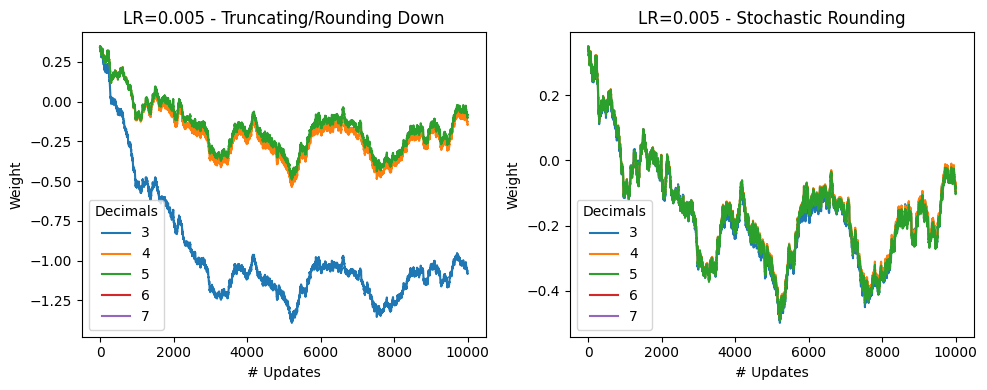

In [36]:
from matplotlib import pyplot as plt

lr = 5e-3
res = rounding_evolution(n_updates=10000, decimals=7, lr=lr)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(np.array(list(res[False].values())).T)
axs[0].legend(res[False].keys(), title='Decimals')
axs[0].set_title(f'LR={lr} - Truncating/Rounding Down')
axs[0].set_ylabel('Weight')
axs[0].set_xlabel('# Updates')
axs[1].plot(np.array(list(res[True].values())).T)
axs[1].legend(res[True].keys(), title='Decimals')
axs[1].set_title(f'LR={lr} - Stochastic Rounding')
axs[1].set_ylabel('Weight')
axs[1].set_xlabel('# Updates')
fig.tight_layout()

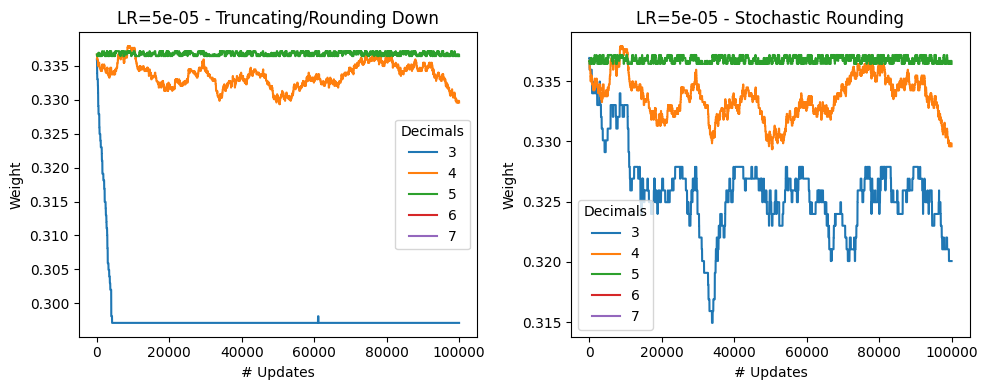

In [37]:
lr = 5e-5
res = rounding_evolution(n_updates=100000, decimals=7, lr=lr)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(np.array(list(res[False].values())).T)
axs[0].legend(res[False].keys(), title='Decimals')
axs[0].set_title(f'LR={lr} - Truncating/Rounding Down')
axs[0].set_ylabel('Weight')
axs[0].set_xlabel('# Updates')
axs[1].plot(np.array(list(res[True].values())).T)
axs[1].legend(res[True].keys(), title='Decimals')
axs[1].set_title(f'LR={lr} - Stochastic Rounding')
axs[1].set_ylabel('Weight')
axs[1].set_xlabel('# Updates')
fig.tight_layout()

#### ÌååÏù¥ÌÜ†ÏπòÏùò SDPA

In [38]:
model = AutoModelForCausalLM.from_pretrained("facebook/opt-350m",
                                             device_map='cuda:0',
                                             attn_implementation="sdpa")

#### Í≤∞Î°†

In [39]:
# https://colab.research.google.com/drive/1_zuAiiBFoFWpexxeWsTS694tCSlMYydoÎ•º Ï∞∏Í≥†Ìï®
def benchmark(model, inputs, n_iterations):
    torch.cuda.reset_max_memory_allocated(device)
    torch.cuda.reset_peak_memory_stats(device)
    torch.cuda.empty_cache()
    torch.cuda.synchronize()

    start_event = torch.cuda.Event(enable_timing=True)
    end_event = torch.cuda.Event(enable_timing=True)
    start_event.record()

    for _ in range(n_iterations):
        _ = model(inputs)

    end_event.record()
    torch.cuda.synchronize()

    max_memory = torch.cuda.max_memory_allocated(device)

    return start_event.elapsed_time(end_event) / n_iterations, max_memory

Î≤§ÏπòÎßàÌÅ¨Î•º Ïã§ÌñâÌï† ÎïåÎßàÎã§ Íπ®ÎÅóÌïú ÏÉÅÌÉúÏóêÏÑú ÏãúÏûëÌïòÍ∏∞ ÏúÑÌï¥ Ïª§ÎÑêÏùÑ Ïû¨ÏãúÏûëÌï¥Ïïº Ìï©ÎãàÎã§.

In [40]:
repo_id = 'facebook/opt-350m'
device = torch.device("cuda:0")
attn_implementation = ['eager', 'sdpa', 'flash_attention_2']
# Îã§Î•∏ Íµ¨ÌòÑÏùÑ ÏÇ¨Ïö©ÌïòÎ†§Î©¥ Ïù¥ Í∞íÏùÑ Î∞îÍæ∏ÏÑ∏Ïöî.
i = 0 # Ï¶âÏãú Î™®Îìú Ïñ¥ÌÖêÏÖò
# Ïñ¥ÌÖêÏÖò Î©îÏª§ÎãàÏ¶òÎßå GPUÏóê Î°úÎìúÌïòÎ©¥ ÎêòÎØÄÎ°ú Î™®Îç∏ÏùÑ CPUÏóê Î°úÎìúÌï©ÎãàÎã§.
model = AutoModelForCausalLM.from_pretrained(repo_id, device_map='cpu',
                                     torch_dtype=torch.float16,
                                     attn_implementation=attn_implementation[i])
# Ï≤´ Î≤àÏß∏ Ï∏µÏóê ÏûàÎäî Ïñ¥ÌÖêÏÖò Î©îÏª§ÎãàÏ¶ò
attn = model.model.decoder.layers[0].self_attn
attn

OPTAttention(
  (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
  (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
  (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
  (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
)

In [41]:
batch_size = 2
sequence_length = 1024
shape = (batch_size, sequence_length, model.config.hidden_size)
inputs = torch.randn(shape, device=device).half()

# ÏõåÎ∞çÏóÖ
attn.to(device)
_ = attn(inputs)

In [42]:
benchmark(attn, inputs, 1000)

/usr/local/lib/python3.12/dist-packages/torch/cuda/memory.py:491: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(


(0.8858112182617187, 778033664)

![](https://github.com/dvgodoy/FineTuningLLMs/blob/main/images/ch5/attn_comparison.png?raw=True)
<center>Table 5.1 - Comparing the performance of attention‚Äôs implementations</center>

### Ïã§Ìóò Í≤∞Í≥º, Ïñ¥Î∏îÎ†àÏù¥ÏÖò Ïä§ÌÉÄÏùº

![](https://github.com/dvgodoy/FineTuningLLMs/blob/main/images/ch5/mem_16_seq500.png?raw=True)

<center>Ìëú 5.2 16ÎπÑÌä∏ OPT-350MÍ≥º ÏãúÌÄÄÏä§ Í∏∏Ïù¥ 500ÏóêÏÑú ÏµúÎåÄ Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ</center>

![](https://github.com/dvgodoy/FineTuningLLMs/blob/main/images/ch5/mem_16_seq2k.png?raw=True)

<center>Ìëú 5.3 16ÎπÑÌä∏ OPT-350MÍ≥º ÏãúÌÄÄÏä§ Í∏∏Ïù¥ 2,000ÏóêÏÑú ÏµúÎåÄ Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ</center>

![](https://github.com/dvgodoy/FineTuningLLMs/blob/main/images/ch5/mem_8_opt.png?raw=True)

<center>Ìëú 5.4 ÏñëÏûêÌôîÎêú OPT-350MÏùò ÏµúÎåÄ Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ</center>

![](https://github.com/dvgodoy/FineTuningLLMs/blob/main/images/ch5/mem_8_falcon.png?raw=True)
<center>Ìëú 5.5 ÏñëÏûêÌôîÎêú ÌåîÏΩò 7BÏùò ÏµúÎåÄ Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ</center>

### Îã§Ïùå Ïû•ÏóêÏÑúÎäî

Í≥ÑÏÇ∞Í≥º Î©îÎ™®Î¶¨Î•º ÍµêÌôòÌïòÎäî Í≤ÉÏùÄ ÏÑ±Í≥µÏ†ÅÏù∏ LLM ÎØ∏ÏÑ∏ ÌäúÎãùÏúºÎ°ú Ïù¥Ïñ¥ÏßÄÎäî ÌïµÏã¨ ÏöîÏÜå Ï§ë ÌïòÎÇòÏûÖÎãàÎã§. Ïù¥Î•º ÌÜµÌï¥ LLMÏù¥ ÎåÄÌôîÌïòÎäî Î∞©Î≤ïÍ≥º ÏûÖÎ†• Î∞õÏùÄ Î™®Îì† ÌÜ†ÌÅ∞Ïóê Ìö®Ïú®Ï†ÅÏúºÎ°ú Ï£ºÏùòÎ•º Í∏∞Ïö∏Ïù¥Îäî Î∞©Î≤ïÏùÑ ÌïôÏäµÌï©ÎãàÎã§. ÎßàÏπ®ÎÇ¥ Ïã§Ï†ú ÌôòÍ≤ΩÏóê Î∞∞Ìè¨Ìï† Ï§ÄÎπÑÍ∞Ä ÎêòÏóàÏäµÎãàÎã§. Ïù¥ÎñÑ ÏµúÏ¢Ö ÏÇ¨Ïö©Ïûê ÌôòÍ≤ΩÏù¥ÎùºÎäî Í∞ÄÏû• ÌÅ∞ ÎèÑÏ†ÑÏùÑ ÏßÅÎ©¥ÌïòÍ≤å Îê† Í≤ÉÏûÖÎãàÎã§. GPU ÏóÜÏù¥ ÏßÄÌòúÏôÄ ÏñëÏûêÌôîÏóêÎßå ÏùòÏ°¥ÌïòÏó¨ ÎÇúÍ¥ÄÏùÑ ÌÜµÍ≥ºÌï¥Ïïº Ìï©ÎãàÎã§. Ïù¥ Ï±ÖÏùò ÎßàÏßÄÎßâ Ïû•ÏùÑ Í∏∞ÎåÄÌï¥ Ï£ºÏÑ∏Ïöî.